In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data=pd.read_excel('D:/Projects/Predict fare of airline tickets/Data_train.xlsx')

# Read the data

In [3]:
train_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
a=set(train_data['Airline'])
print(a)
print("Total number of airlines ",len(a))

{'Jet Airways Business', 'GoAir', 'Multiple carriers Premium economy', 'Vistara Premium economy', 'Air Asia', 'IndiGo', 'Trujet', 'Multiple carriers', 'Jet Airways', 'Vistara', 'Air India', 'SpiceJet'}
Total number of airlines  12


In [5]:
train_data.shape

(10683, 11)

In [6]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
train_data['Total_Stops'].isnull().sum()
train_data[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [8]:
train_data=train_data.dropna(subset='Total_Stops')
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# Feature preprocessing

Lets begin by transforming the features that contains dates to datetime type

In [9]:
def change_into_datetime(col):
    data[col]=pd.to_datetime(data[col])

In [10]:
data=train_data.copy()

In [11]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [12]:

for feature in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    change_into_datetime(feature)

C:\Users\ASUS TUF\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\ASUS TUF\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24/06/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\ASUS TUF\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27/05/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\ASUS TUF\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '18/04/2019' in DD/MM/YYYY format. Provide form

In [13]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [14]:
#creating new colmns based on Date_of_journey :Featurization
data['journey_day']=data['Date_of_Journey'].dt.day
data['journey_month']=data['Date_of_Journey'].dt.month
data['journey_year']=data['Date_of_Journey'].dt.year
data.drop('Date_of_Journey',axis=1,inplace=True)

In [15]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-12-17 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-12-17 05:50:00,2022-12-17 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2022-12-17 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2022-12-17 18:05:00,2022-12-17 23:30:00,5h 25m,1 stop,No info,6218,5,12,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2022-12-17 16:50:00,2022-12-17 21:35:00,4h 45m,1 stop,No info,13302,3,1,2019


In [16]:
#featurization of arrival_time and dep_time by extracting hours and minutes 
def extract_hour_min(df,col):
    df[col+'_hour']=df[col].dt.hour
    df[col+'_minute']=df[col].dt.minute
    df.drop(col,axis=1,inplace=True)
    return df.head(2)

In [17]:
extract_hour_min(data,'Dep_Time')

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-12-17 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50


In [18]:
extract_hour_min(data,'Arrival_Time')

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15


Lets analysis when the flights mostly take of

In [19]:
def time_to_part(time):
    if (time>4) and (time<8):
        return "Early morning"
    elif (time>8) and (time<=12):
        return "Morning"
    elif (time>12) and (time<=16):
        return "Noon"
    elif (time>16) and (time<=20):
        return "Evening"
    elif (time>20) and (time<=24):
        return "Night"
    else :
        return "Late night"

<AxesSubplot:>

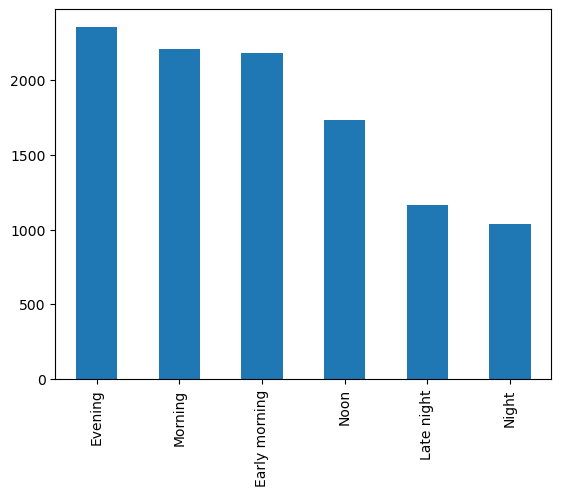

In [20]:
data['Dep_Time_hour'].apply(time_to_part).value_counts().plot(kind='bar')

This a basic pandas plot ,we will use plotly and cufflins to make a more attractive plotb

In [21]:
!pip install plotly

In [22]:
!pip install cufflinks

In [21]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import  download_plotlyjs,init_notebook_mode,plot,iplot

In [22]:
#without exucuting this command nothing will occure because we should go offline befor that
cf.go_offline()

In [23]:
#we will use iplot inplace of plot
data['Dep_Time_hour'].apply(time_to_part).value_counts().iplot(kind='bar')

Preprocess Duration feature and extract meaningfull feature from it

In [24]:
data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15


In [25]:
data['Duration']

0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680        3h
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [26]:
def preprocess_Duration(x):
    if 'h' not in x:
        x='0h '+x
    elif 'm' not in x:
        x=x+' 0m'
    return x

In [27]:
preprocess_Duration(data['Duration'][2])

'19h 0m'

In [28]:
data['Duration']=data['Duration'].apply(preprocess_Duration)

In [29]:
data['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [30]:
int(data['Duration'][2].split(' ')[0][0:-1])

19

In [31]:
data['Duration_hour']=data['Duration'].apply(lambda x:int(x.split(' ')[0][0:-1]))

In [32]:
data['Duration_min']=data['Duration'].apply(lambda x:int(x.split(' ')[1][0:-1]))

In [33]:
data.head(5)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35,4,45


Analysing whether the duration impact the ticket Price or not

In [34]:
data['Duration_total_mins']=data['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [35]:
data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_min,Duration_total_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25,445


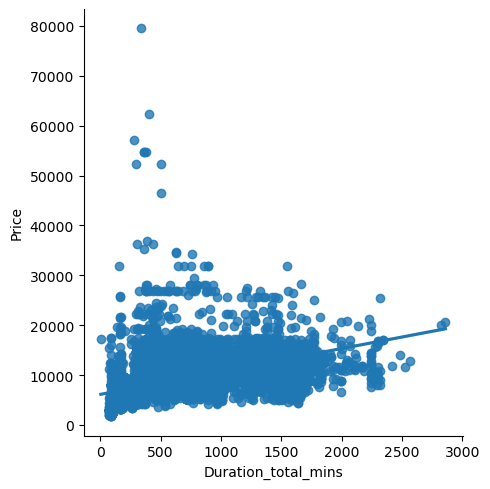

In [36]:
sns.lmplot(x='Duration_total_mins',y='Price',data=data)

Which destination have the maximum number of flights ?

<AxesSubplot:ylabel='Destination'>

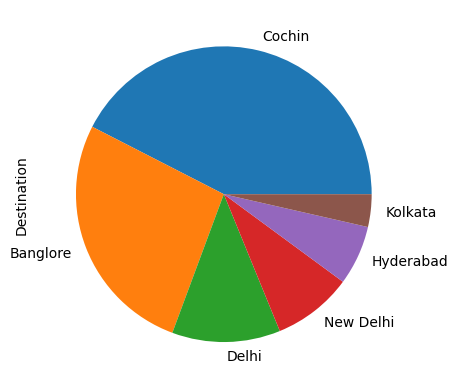

In [37]:
data['Destination'].value_counts().plot(kind='pie')

In [38]:
data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Duration               object
Total_Stops            object
Additional_Info        object
Price                   int64
journey_day             int64
journey_month           int64
journey_year            int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hour           int64
Duration_min            int64
Duration_total_mins     int64
dtype: object

In [39]:
data['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

# Bivariate analysis

on which route Jet airways is extremely used

In [40]:
data[data['Airline']=='Jet Airways']

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_min,Duration_total_mins
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0,1140
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,15h 30m,1 stop,In-flight meal not included,11087,3,12,2019,18,55,10,25,15,30,930
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,21h 5m,1 stop,No info,22270,3,1,2019,8,0,5,5,21,5,1265
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,25h 30m,1 stop,In-flight meal not included,11087,3,12,2019,8,55,10,25,25,30,1530
13,Jet Airways,Kolkata,Banglore,CCU → BOM → BLR,12h 10m,1 stop,In-flight meal not included,9663,5,9,2019,21,10,9,20,12,10,730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10668,Jet Airways,Delhi,Cochin,DEL → JDH → BOM → COK,7h 20m,2 stops,No info,21219,5,9,2019,11,40,19,0,7,20,440
10672,Jet Airways,Delhi,Cochin,DEL → AMD → BOM → COK,19h 55m,2 stops,In-flight meal not included,11150,27,6,2019,23,5,19,0,19,55,1195
10673,Jet Airways,Delhi,Cochin,DEL → AMD → BOM → COK,15h 0m,2 stops,No info,16704,27,5,2019,13,25,4,25,15,0,900
10674,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,24h 45m,1 stop,In-flight meal not included,11087,3,12,2019,20,35,21,20,24,45,1485


In [41]:
data[data['Airline']=='Jet Airways']['Route'].value_counts()

CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
BOM → DED → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
Name: Route, dtype: int64

Draw the distribution of price for each Airline

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

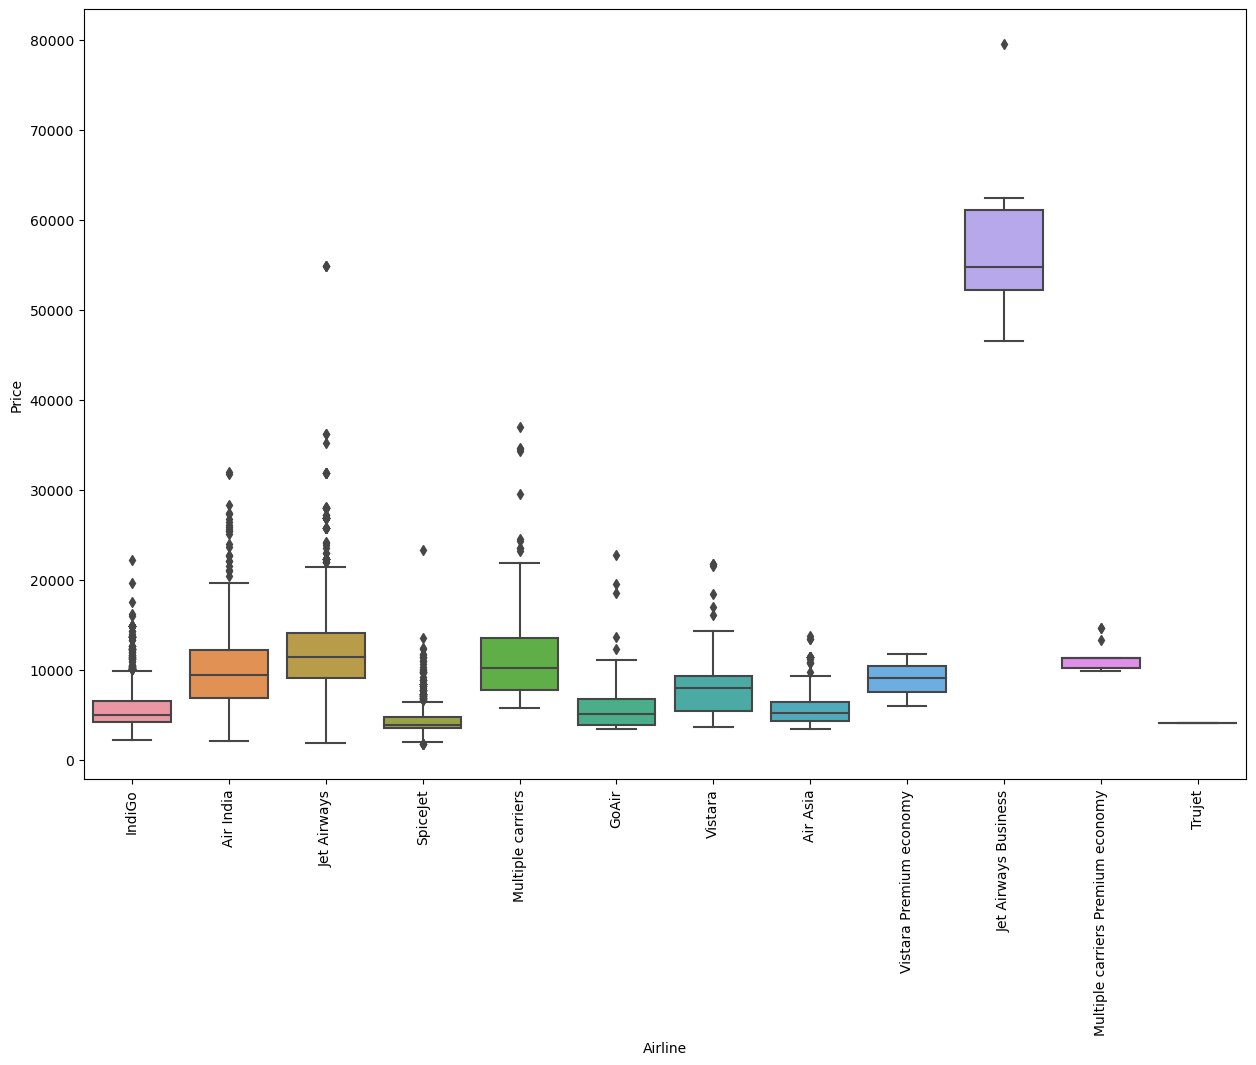

In [42]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Airline',y='Price',data=data)
plt.xticks(rotation='vertical')

In general if we need the boxplot and the distribution of the data we use the 'Violinplot '

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

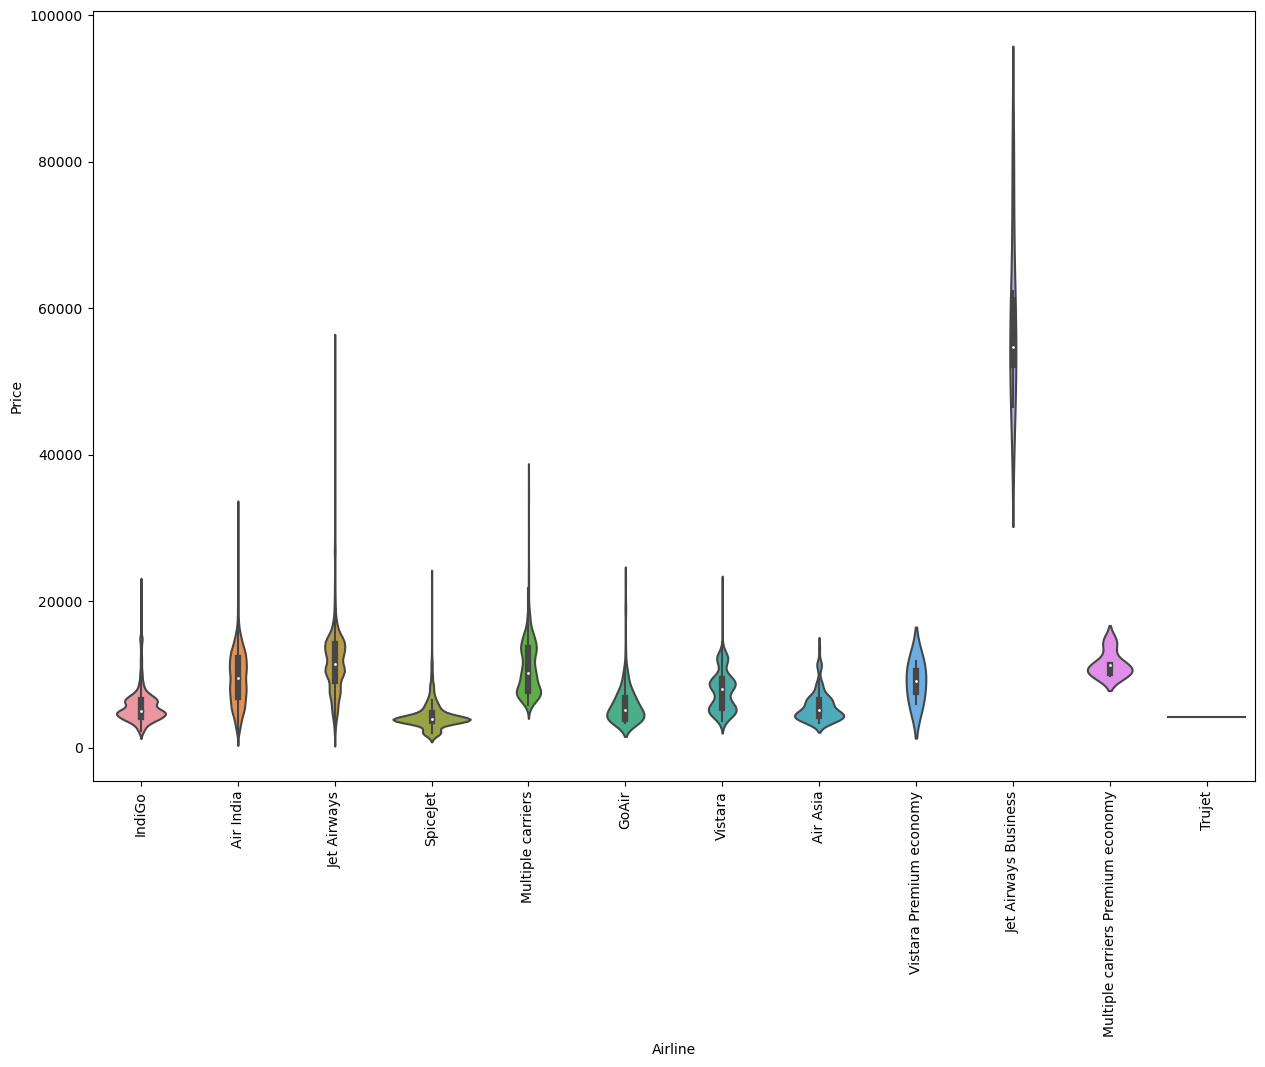

In [43]:
plt.figure(figsize=(15,10))
sns.violinplot(y='Price',x='Airline',data=data)
plt.xticks(rotation='vertical')

In [44]:
data.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_min,Duration_total_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0,1140


In [45]:
def change_stops(x):
    if x=="non-stop":
        return 0
    else:
        return int(x.split(' ')[0])

In [46]:
data['Total_Stops'].apply(change_stops)

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

In [47]:
data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Duration               object
Total_Stops            object
Additional_Info        object
Price                   int64
journey_day             int64
journey_month           int64
journey_year            int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hour           int64
Duration_min            int64
Duration_total_mins     int64
dtype: object

In [48]:
len(data['Route'].unique())

128

In [49]:
np.round(data['Additional_Info'].value_counts()/len(data)*100,2)

No info                         78.11
In-flight meal not included     18.55
No check-in baggage included     3.00
1 Long layover                   0.18
Change airports                  0.07
Business class                   0.04
No Info                          0.03
1 Short layover                  0.01
Red-eye flight                   0.01
2 Long layover                   0.01
Name: Additional_Info, dtype: float64

Here we can see that at most of the cases there is no addiotional information 
so we can say that this feature is not not useful and we can drop it
also Route because the total num of stops can represent this feature

In [50]:
data.drop(columns=['Additional_Info','journey_year','Duration_total_mins','Route'],axis=1,inplace=True)

In [51]:
data.dtypes

Airline                object
Source                 object
Destination            object
Duration               object
Total_Stops            object
Price                   int64
journey_day             int64
journey_month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hour           int64
Duration_min            int64
dtype: object

# Feature encoding

In [52]:
[col for col in data.columns if data[col].dtype=='object']

['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops']

In [53]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [54]:
data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

Rule:

Ordinal Data=>Labelencoding
     
   Nominal Data=>onehot encoding

In [55]:
for category in data['Source'].unique():
    data['Source_'+category]=data['Source'].apply(lambda x: 1 if x ==category else 0)

In [56]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_min,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25,0,1,0,0,0


if the Airline feature has 1000 different values,by onehot encoding 999 different new features will be generated!!! this is not optimal
=>use guided encoding (val0:0,val1=1,...)

In [57]:
data['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [58]:
airlines=data.groupby('Airline')['Price'].mean().sort_values().index

In [59]:
dict1={key:index for index,key in enumerate(airlines,0)}

In [60]:
dc={key:val for val,key in enumerate(data['Airline'].unique(),0)}

In [61]:
dc

{'IndiGo': 0,
 'Air India': 1,
 'Jet Airways': 2,
 'SpiceJet': 3,
 'Multiple carriers': 4,
 'GoAir': 5,
 'Vistara': 6,
 'Air Asia': 7,
 'Vistara Premium economy': 8,
 'Jet Airways Business': 9,
 'Multiple carriers Premium economy': 10,
 'Trujet': 11}

In [62]:
data['Airline']=data['Airline'].map(dict1)

In [63]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_min,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25,0,1,0,0,0


In [64]:
Sources=data.groupby('Source')['Price'].mean().sort_values().index

In [65]:
Sources

Index(['Chennai', 'Mumbai', 'Banglore', 'Kolkata', 'Delhi'], dtype='object', name='Source')

In [66]:
dict2={key:src for src,key in enumerate(Sources,0)}
dict2

{'Chennai': 0, 'Mumbai': 1, 'Banglore': 2, 'Kolkata': 3, 'Delhi': 4}

In [67]:
data['Source']=data['Source'].map(dict2)

In [68]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_min,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25,0,1,0,0,0


In [69]:
Destin=data.groupby('Destination')['Price'].mean().sort_values().index

In [70]:
Destin

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin', 'New Delhi'], dtype='object', name='Destination')

In [71]:
dict3={key:dst for dst,key in enumerate(Destin,0)}
dict3

{'Kolkata': 0,
 'Hyderabad': 1,
 'Delhi': 2,
 'Banglore': 3,
 'Cochin': 4,
 'New Delhi': 5}

In [72]:
data['Destination']=data['Destination'].map(dict3)

In [73]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_min,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,5,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,3,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25,0,1,0,0,0
2,10,4,4,19h 0m,2 stops,13882,6,9,9,25,4,25,19,0,0,0,1,0,0
3,3,3,3,5h 25m,1 stop,6218,5,12,18,5,23,30,5,25,0,1,0,0,0
4,3,2,5,4h 45m,1 stop,13302,3,1,16,50,21,35,4,45,1,0,0,0,0


In [74]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [75]:
stops={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [76]:
data['Total_Stops']=data['Total_Stops'].map(stops)

In [77]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_min,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,5,2h 50m,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,3,7h 25m,2,7662,5,1,5,50,13,15,7,25,0,1,0,0,0


# Handel Outliers

to Detect outliers use:

-Distribution

-Histogram

-Boxplot

In [78]:
def plotf(df,col):
    fig,(ax1,ax2,ax3)=plt.subplots(3,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)
    sns.distplot(df[col],ax=ax3,kde=False)

C:\Users\ASUS TUF\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\ASUS TUF\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\ASUS TUF\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



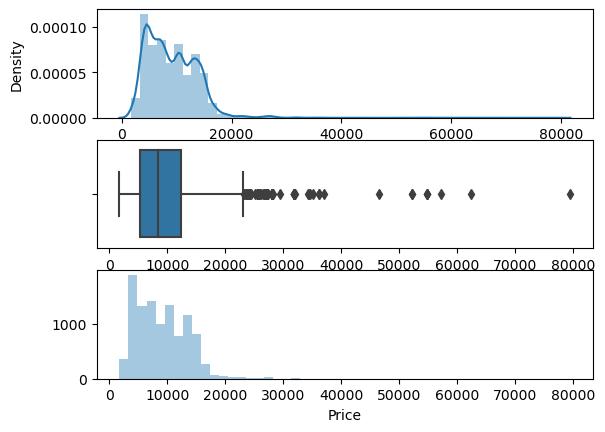

In [79]:
plotf(data,'Price')

we will replace outliers with the median because if we will use the mean it is already affected by outliers 

In [80]:
data['Price']=np.where(data['Price']>=35000,data['Price'].median(),data['Price'])

C:\Users\ASUS TUF\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\ASUS TUF\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



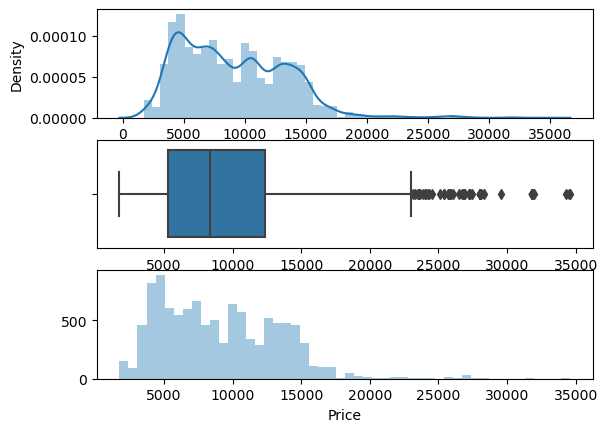

In [81]:
plotf(data,'Price')

In [82]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_min,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,5,2h 50m,0,3897.0,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,3,7h 25m,2,7662.0,5,1,5,50,13,15,7,25,0,1,0,0,0
2,10,4,4,19h 0m,2,13882.0,6,9,9,25,4,25,19,0,0,0,1,0,0
3,3,3,3,5h 25m,1,6218.0,5,12,18,5,23,30,5,25,0,1,0,0,0
4,3,2,5,4h 45m,1,13302.0,3,1,16,50,21,35,4,45,1,0,0,0,0


# Feature selection

In [83]:
data.drop(columns=['Source','Duration'],axis=1,inplace=True)

In [84]:
data.head(2)

,Airline,Destination,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_min,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,5,0,3897.0,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,7662.0,5,1,5,50,13,15,7,25,0,1,0,0,0


In [85]:
data.dtypes

Airline                  int64
Destination              int64
Total_Stops              int64
Price                  float64
journey_day              int64
journey_month            int64
Dep_Time_hour            int64
Dep_Time_minute          int64
Arrival_Time_hour        int64
Arrival_Time_minute      int64
Duration_hour            int64
Duration_min             int64
Source_Banglore          int64
Source_Kolkata           int64
Source_Delhi             int64
Source_Chennai           int64
Source_Mumbai            int64
dtype: object

Methods for feature selection:

1/Select the best(for regression):

-f_reg:use the concept of correlation

-Mutual_info_reg:measure the dependency between the target and the independent variables

In [86]:
from sklearn.feature_selection import mutual_info_regression

In [87]:
x=data.drop(columns=['Price'],axis=1)

In [88]:
y=data['Price']

In [89]:
mutual_info_regression(x,y)

array([0.98269986, 1.11331908, 0.80090094, 0.19842757, 0.24929184,
       0.337055  , 0.25115556, 0.40006552, 0.35601161, 0.47293915,
       0.34189044, 0.39884498, 0.46635326, 0.51613332, 0.12823578,
       0.19444737])

In [90]:
imp=pd.DataFrame(mutual_info_regression(x,y),index=x.columns)

In [91]:
imp

,0
Airline,0.971614
Destination,1.115001
Total_Stops,0.786116
journey_day,0.184613
journey_month,0.247314
Dep_Time_hour,0.336934
Dep_Time_minute,0.260965
Arrival_Time_hour,0.408704
Arrival_Time_minute,0.353893
Duration_hour,0.464807


In [92]:
imp.columns=['Importance']

In [93]:
imp

,Importance
Airline,0.971614
Destination,1.115001
Total_Stops,0.786116
journey_day,0.184613
journey_month,0.247314
Dep_Time_hour,0.336934
Dep_Time_minute,0.260965
Arrival_Time_hour,0.408704
Arrival_Time_minute,0.353893
Duration_hour,0.464807


In [94]:
imp.sort_values(by='Importance',ascending=False)

,Importance
Destination,1.115001
Airline,0.971614
Total_Stops,0.786116
Source_Delhi,0.513506
Source_Kolkata,0.467702
Duration_hour,0.464807
Arrival_Time_hour,0.408704
Source_Banglore,0.384811
Arrival_Time_minute,0.353893
Duration_min,0.343307


# intuitition bihind Random Forest 

Random Forest and XGBoost are ensenble learning methods (they use multiple dicision tree)

Random Forest is used for both Classification and regresssion 

How to select the parent feature in decision tree :

-Entropy and information gain : the feature the higher entropy will be selected as the parent node (Entr_feat=-Pi*log2(Pi) with  i represent a class in that feature)

-Gini index : 1-sum(Pi*** 2)* the sum over all classe in that feature , the parent is the feature that comes with the lowest Gini index

In Random Forest each decision tree is trained on a random set of the data 

Decision Tree is caracterised with a high variance(sensible to outliers)
But Random forest reduce this high variance by averaging all the predictions of the decision trees .


In [95]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [96]:
from sklearn.ensemble import RandomForestRegressor

In [97]:
ml_model=RandomForestRegressor()

In [98]:
model=ml_model.fit(X_train,y_train)

In [99]:
y_pred=model.predict(X_test)

In [100]:
y_pred

array([16703.43,  6690.71,  8873.82, ...,  3541.42,  6352.91,  6972.92])

In [101]:
y_pred.shape

(2671,)

In [102]:
len(X_test)

2671

In [103]:
!pip install pickle

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [104]:
import pickle

we will store our ML model in a file using pickle package library and call it in case of need .

  -pickle.dump to store the model in the file 
  
  -pickle.load to load the model 

In [105]:
file=open(r'D:/random_forest.pkl','wb')

In [106]:
pickle.dump(model,file)

In [107]:
model=open(r'D:/random_forest.pkl','rb')

In [108]:
forest=pickle.load(model)

In [109]:
forest.predict(X_test)

array([16703.43,  6690.71,  8873.82, ...,  3541.42,  6352.91,  6972.92])

Entropy/information_gain :measure of impurity inside the data / the randomness in the data

infor_gain=1-(Sn_i/S)*Ei with Sn_i number of class i un that feature and S the tatal numb of samples in the data

In [110]:
def mape(y_true,y_pred):
    y_true,y_pred=np.array(y_true),np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [111]:
mape(y_test,forest.predict(X_test))

13.199697973324842

Automating the ML pipeline 

In [112]:
def predict(ml_model):
    model=ml_model.fit(X_train,y_train)
    print('Train_score:{}'.format(model.score(X_train,y_train)))
    y_prediction=model.predict(X_test)
    print('Predictions are :{}'.format(y_prediction))
    print('\n')
    from sklearn import metrics
    r2_score=metrics.r2_score(y_test,y_prediction)
    print('r2_score = {}'.format(r2_score))
    print('RMSE =',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    sns.displot(y_test-y_prediction)
          

Train_score:0.9517456960658859
Predictions are :[16767.83  6435.07  8806.99 ...  3521.49  6175.27  7238.46]


r2_score = 0.804329244172575
RMSE = 1951.727424790778


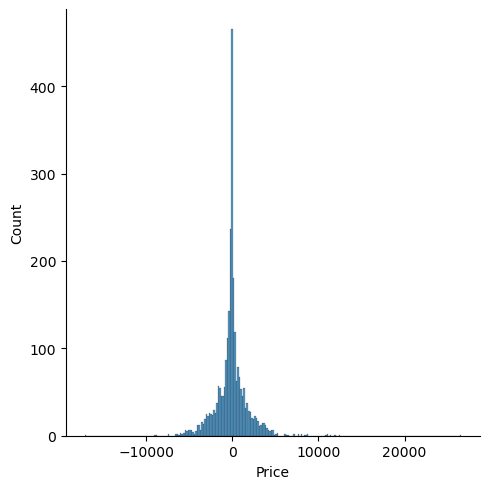

In [113]:
predict(RandomForestRegressor())

In [114]:
from sklearn.linear_model import LinearRegression

In [115]:
predict(LogisticRegression())

NameError: name 'LogisticRegression' is not defined

Train_score:0.5996767833054307
Predictions are :[12602.18134419  8731.28492806  8921.77116345 ...  3111.04770061
  9602.45368438  8194.09500747]


r2_score = 0.5860128273008434
RMSE = 2838.8970648352984


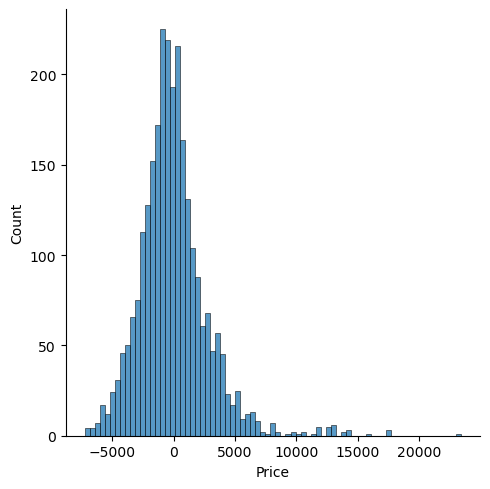

In [157]:
predict(LinearRegression())

# Parameter hypertuning

Two methods can be used RandomSearch and gridsearch but RandomSearch is faster and computationally better than gridsearch

In [119]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics

In [116]:
#Initialize an instance of the model
reg_rf=RandomForestRegressor()

In [126]:
#define the possible values of each parameter of the model
n_estimaters=[int(i) for i in np.linspace(start=500,stop=1200,num=20)]
max_features=['auto','sqrt']
max_depth=[int(i) for i in np.linspace(start=5,stop=30,num=10)]
min_samples_split=[5,10,15,100]

In [127]:
#define a dictionnary that contains all the possible values 
random_grid={
'n_estimators':n_estimaters,
'max_features':max_features,
'max_depth':max_depth,
'min_samples_split':min_samples_split
}

In [128]:
#use RandomizedsearchCV of sklearn to find the best parameters of the model
rf_random=RandomizedSearchCV(reg_rf,param_distributions=random_grid,verbose=2,n_jobs=-1)

In [129]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 7, 10, 13, 16, 18, 21,
                                                      24, 27, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [500, 536, 573, 610,
                                                         647, 684, 721, 757,
                                                         794, 831, 868, 905,
                                                         942, 978, 1015, 1052,
                                                         1089, 1126, 1163,
                                                         1200]},
                   verbose=2)

In [130]:
pred_tun=rf_random.predict(X_test)

In [132]:
metrics.r2_score(y_test,pred_tun)

0.830413747148968

In [133]:
rf_random.best_params_

{'n_estimators': 831,
 'min_samples_split': 15,
 'max_features': 'auto',
 'max_depth': 16}